In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
#searching for train test data set
#ls ../input/home-data-for-ml-course/
!ls ../input/home-data-for-ml-course/

data_description.txt   sample_submission.csv.gz  test.csv.gz  train.csv.gz
sample_submission.csv  test.csv			 train.csv


In [3]:
#!more ../input/home-data-for-ml-course/data_description.txt

In [4]:
train_data = pd.read_csv('../input/home-data-for-ml-course/train.csv.gz',compression='gzip')
test_data  = pd.read_csv('../input/home-data-for-ml-course/test.csv.gz',compression='gzip')
len(train_data.columns)
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We see above that the data set contains many features (len(train_data.columns)-1(target_variable)-1(may be index)). In machine learning lingo features represent to the independent variables of any chosen model - something like x in the linear regression model y=b1x+b0. Although they are in the dataset, not all features-all columns except target column (SalePrice in this data)- are equally important for our calculation that is designed to predict home price. If we give all features the same priority and train our model with them, we will probably get the garbage result that is just useless. Because of this, it is very important to select some important characteristics that have a strong influence on the target size, which in the machine learning lingo often refers to as feature selection. This will be done in the next code shell. In this notebook there are tasks related to the following topics:

1) Find and drop all missing values  \
2) Observe pairwise correlation (pearson correlation) between different features \
3) Feature selection based on correlation \
4) Split data into train and testing set  \
5) Building models and tunning hyperparameters  \
6) Evaluate eccuracy of model  \
7) Calculate feature important \
8) Conclusion

In [5]:
# In this cell I am going to create a directionary with features as key and sum of missing values as value.
train_data.isnull().sum()
columns = list(train_data.columns)
null = 0
null_col = {}
for col in columns:
    if train_data[col].isnull().sum() != 0:
        null += 0
        null_col[col]=train_data[col].isnull().sum()

#with sep='', different items are separated by space in the output console        
print(null_col,sep=' ')

{'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 8, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}


As a result of the print statement, various characteristics and the total number of missing values associated with them can be seen. Looking at these features, it does not appear that these are the deal breaker features for pricing houses. For the sake of simplicity, these features are all omitted for now.

In [6]:
col_to_drop = list(null_col.keys())
new_train_data = train_data.drop(col_to_drop,axis=1)

print(len(train_data.columns))
print(len(new_train_data.columns)+len(col_to_drop)) #the second one is no of droped columns

81
81


In [7]:
if new_train_data.columns.isnull().sum() != 0: print(' Still has some missing values')

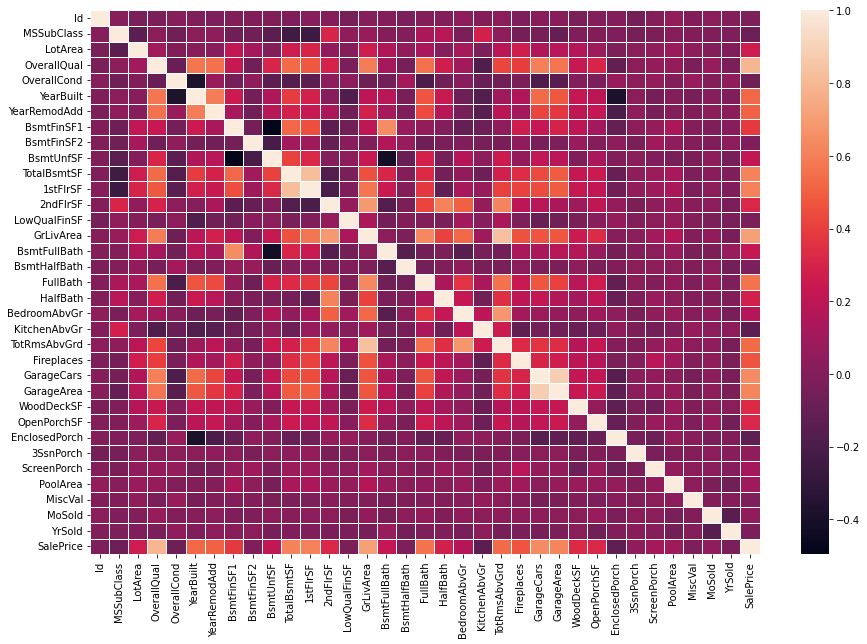

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#this creates a canvas for plotting
fig,ax = plt.subplots(figsize=(15,10)) 

#pictures will be placed on this canvas
sns.heatmap(new_train_data.corr(),linewidths=0.5,ax=ax);     


In [9]:
#Select the most important features
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',\
            'PoolArea','OverallCond','Fireplaces']

X_train = new_train_data[features]
Y_train = new_train_data['SalePrice']
#X_test  = test_data[features]
#Y_test  = test_data['SalePrice']

# Apparently /kaggle/input/home-data-for-ml-course/test.csv doesn't have SalePrice column (target variable). 
# Therefore, given training data is used as whole data set.

X = X_train
Y = Y_train

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, precision_score, accuracy_score

def build_model_get_error(X,Y):
    #25% percentage of data is allocated for testing purpose
    train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.25,random_state=1)
    #print(len(train_X),len(test_X))
    
    RFR_model = RandomForestRegressor(random_state=1)
    RFR_model.fit(train_X,train_Y)
    y_predict = RFR_model.predict(test_X)
    MAE = mean_absolute_error(test_Y,y_predict)    
    print(MAE)
    return train_X, test_X, train_Y, test_Y, RFR_model, y_predict, MAE

train_X, test_X, train_Y, test_Y, RFR_model, y_predict, MAE = build_model_get_error(X,Y)      

19331.434566210046


In [11]:
#Let see parameters that are used by our current model
RFR_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

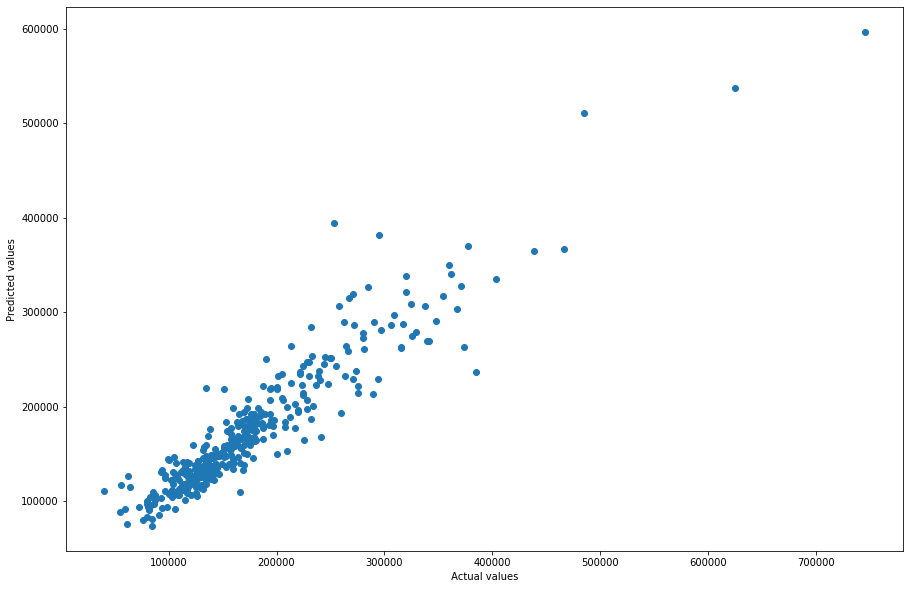

In [12]:
#y_predict is the home price value predicted by our model and in the ideal world it is expected this value to be the same as test_Y 
fig,ax = plt.subplots(figsize=(15,10)) 
plt.xlabel(' Actual values ')
plt.ylabel(' Predicted values ')
plt.scatter(test_Y,y_predict);

In [13]:
#Let's try training the model with different number estimators. This is a technique to optimize n_estimator of our model.
def get_mae(estimator,train_X,test_X,train_y,test_y):
    RFR_model = RandomForestRegressor(n_estimators=estimator,random_state=1)
    RFR_model.fit(train_X,train_y)
    y_predict = RFR_model.predict(test_X)
    mae = mean_absolute_error(test_y,y_predict)
    return mae

max_estimator = [int(x) for x in np.linspace(start=50, stop=1000, num=20)]

mae_out = {estimator:get_mae(estimator,train_X,test_X,train_Y,test_Y) for estimator in max_estimator}
mae_out

{50: 19509.547598173518,
 100: 19331.434566210046,
 150: 19438.272304414004,
 200: 19405.180320287018,
 250: 19456.699709849967,
 300: 19439.32332115677,
 350: 19416.345934582052,
 400: 19364.679651663406,
 450: 19319.754127708922,
 500: 19332.19983352903,
 550: 19331.890734507502,
 600: 19321.82278212655,
 650: 19366.70165346982,
 700: 19383.10922616718,
 750: 19396.59242861492,
 800: 19413.919105022833,
 850: 19403.790342197153,
 900: 19396.886526491267,
 950: 19389.31779208295,
 1000: 19383.328393803}

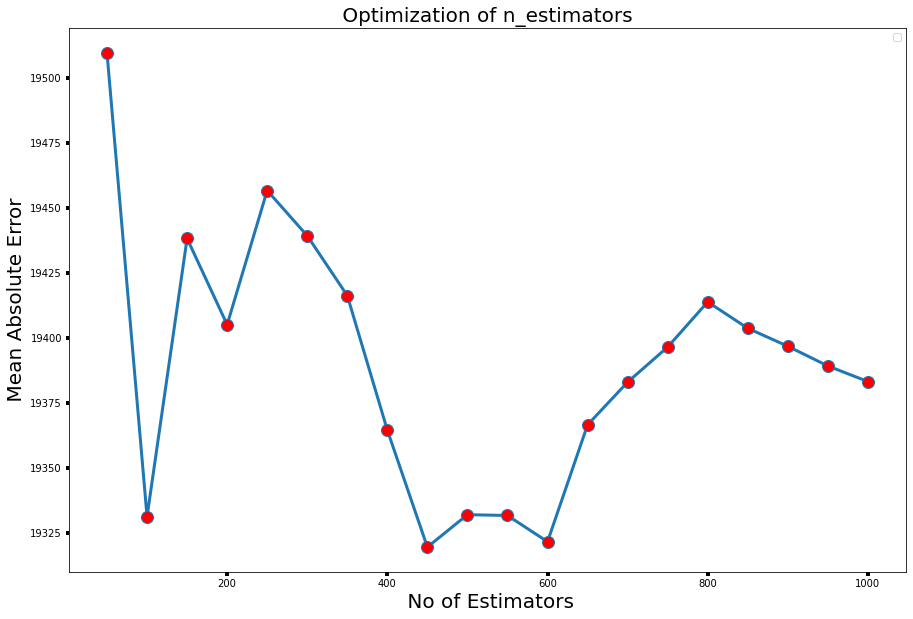

In [14]:
#PLotting the number of estimator as x-axis and the mean absolute error as y-axis
fig,ax = plt.subplots(figsize=(15,10))
x_axis = np.array(list(mae_out.keys()))
y_axis = np.array(list(mae_out.values()))
ax.tick_params(width=4.0)
plt.title(' Optimization of n_estimators ',fontsize=20)
plt.xlabel(' No of Estimators',fontsize=20)
plt.ylabel(' Mean Absolute Error ',fontsize=20)
plt.legend(loc='upper right')
plt.plot(x_axis,y_axis,'-',marker='o',linewidth=3.0,markersize=12,markerfacecolor='red');

In [15]:
#Calculate the number of estimators that correspond to the minimum and maximum error
(min(mae_out,key=mae_out.get),max(mae_out,key=mae_out.get))

(450, 50)

In [16]:
#Value of dictionary corresponds to minimum MAE {round(mae_out[min(mae_out,key=mae_out.get)],2)} 
print(f' The value of estimator that corresponds to minimum MAE is {min(mae_out,key=mae_out.get)}. ')
print(f' The value of estimator that corresponds to maximum MAE is {max(mae_out,key=mae_out.get)}. ')

 The value of estimator that corresponds to minimum MAE is 450. 
 The value of estimator that corresponds to maximum MAE is 50. 


The calculations in the above shell shows that the best estimator with a small mean absolute error is 450. This value is slightly larger than the default (100 estimators). But here it has to be noted that although we have increased the estimator, MAE has not changed that much (19509.55 for 50 estimators and 19319.75 for 450 estimators). Considering the increase in computational effort that does not proportionally reduce MAE, we can consider using default value as well. This result is important because simply increasing the hyperparameters in the model does not guarantee that the accuracy of the model will increase by that ratio, in some case result may appears worse. Nevertheless, the calculation shown below continues with the best estimate value of estimators.

In [17]:
RFR_model = RandomForestRegressor(n_estimators=450,random_state=1,n_jobs=2)
RFR_model.fit(train_X,train_Y)

RandomForestRegressor(n_estimators=450, n_jobs=2, random_state=1)

In [18]:
print(' Model parameters that are used ')
print(RFR_model.get_params(),)
print()
print(' Features used in calculation are ')
print(X.columns,sep=' ')
print()
print(' Feature Importances ')
print(RFR_model.feature_importances_)
print()
sorted_index = RFR_model.feature_importances_.argsort()
Feature_Table = pd.DataFrame({'Features':list(X.columns[sorted_index]),'Feature_Importances':RFR_model.feature_importances_[sorted_index]})
Feature_Table

 Model parameters that are used 
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 450, 'n_jobs': 2, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}

 Features used in calculation are 
Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'PoolArea', 'OverallCond',
       'Fireplaces'],
      dtype='object')

 Feature Importances 
[0.07968469 0.29736418 0.33704001 0.13827933 0.02817906 0.01142876
 0.05184338 0.00132749 0.02290979 0.03194329]



,Features,Feature_Importances
0,PoolArea,0.001327
1,BedroomAbvGr,0.011429
2,OverallCond,0.022910
3,FullBath,0.028179
4,Fireplaces,0.031943
5,TotRmsAbvGrd,0.051843
6,LotArea,0.079685
7,2ndFlrSF,0.138279
8,YearBuilt,0.297364
9,1stFlrSF,0.337040


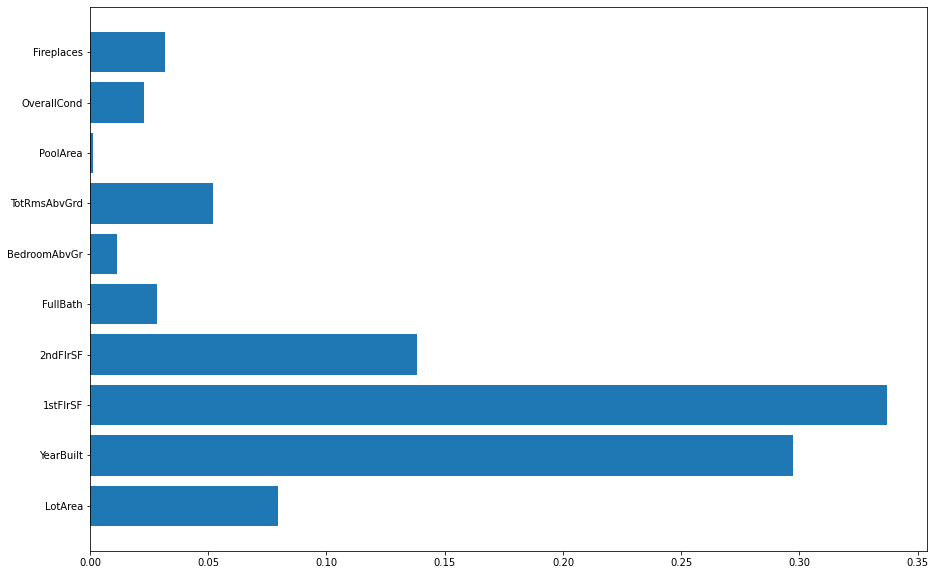

In [19]:
#plt.barh(X[features],RFR_model.feature_importances_)
fig,ax = plt.subplots(figsize=(15,10))
plt.barh(X.columns,RFR_model.feature_importances_);

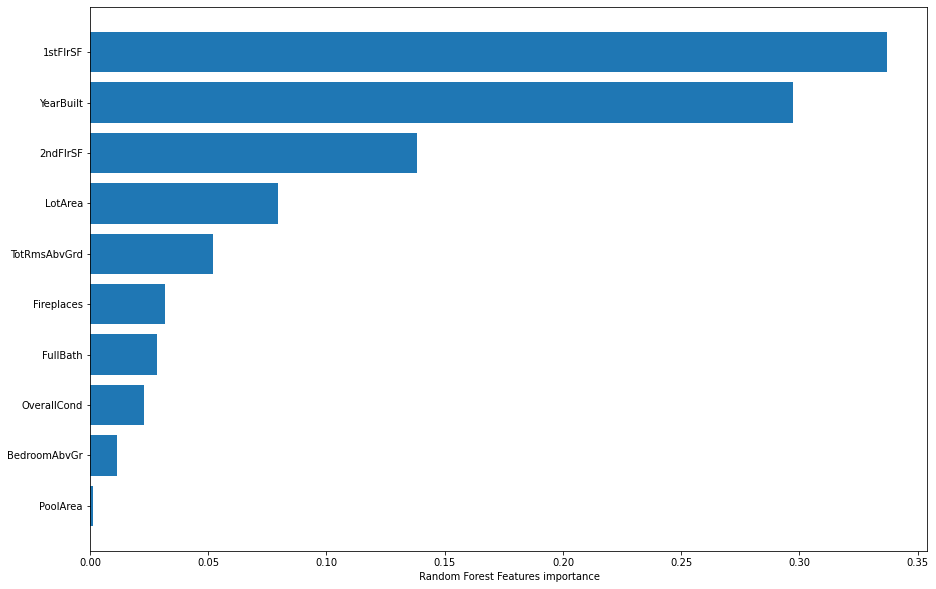

In [20]:
#The same plot, but with the argument sorted by increasing importance
fig,ax = plt.subplots(figsize=(15,10))
sorted_index = RFR_model.feature_importances_.argsort()
plt.xlabel(' Random Forest Features importance')
plt.barh(X.columns[sorted_index],RFR_model.feature_importances_[sorted_index]);

In [21]:
#Accuracy on the training data set
y_predict_train         = RFR_model.predict(train_X)
mae_train               = mean_absolute_error(train_Y,y_predict_train)
errors_train            = abs(y_predict_train-train_Y)
mean_absolute_error_per = 100*np.mean(errors_train/train_Y)
Accuracy_train          = 100-mean_absolute_error_per
R2_score_Train          = 1-(sum( (train_Y-y_predict_train)**2)/sum( (train_Y-train_Y.mean())**2) )

#Accuracy on the test data set
y_predict               = RFR_model.predict(test_X)
mae                     = mean_absolute_error(test_Y,y_predict)
errors                  = abs(y_predict-test_Y)
mean_absolute_error_per = 100*np.mean(errors/test_Y)
Accuracy                = 100-mean_absolute_error_per
R2_score_test           = 1- ( sum( (test_Y-y_predict)**2 )/sum( ( test_Y-test_Y.mean() )**2 ) )

print(' Model Performance are the following ')


print(' ================RESULTS======================  ')
print()
print(' In the train data set  ')
print()
print(f' The mean absolute error   : {round(mae_train,2)}. ')
print(f' Average Error             : {round(np.mean(errors_train),2)}')
print(f' Accuracy                  : {round(Accuracy_train,2)}%.')
print(f' R2 score on training data : {round(R2_score_Train,2)}')
print()
print(' In the test data set  ')
print()
print(f' The mean absolute error  : {round(mae,2)}. ')
print(f' Average Error            : {round(np.mean(errors),2)}')
print(f' Accuracy                 : {round(Accuracy,2)}%.')
print(f' R2 score on testing data : {round(R2_score_test,2)}')
print(' =============================================  ')

 Model Performance are the following 
 ================RESULTS======================  

 In the train data set  

 The mean absolute error   : 7740.2. 
 Average Error             : 7740.2
 Accuracy                  : 95.62%.
 R2 score on training data : 0.97

 In the test data set  

 The mean absolute error  : 19319.75. 
 Average Error            : 19319.75
 Accuracy                 : 88.27%.
 R2 score on testing data : 0.87


We compared the model performance by observing the mean absolute error and R2 score on both the train and test data sets. By observing these values, I sense an overfitting problem as my performance on the train dataset is very good at 95% accuracy. However, the discrepancy in the test data set is larger--accuracy just 88.27%. This certainly indicates there is room for an improvement. Nevertheless, this is already a significant improvement over the single decision tree result shown in the following section.

# **Decision Tress Regressor**

The following uses the same data for the decision tree regressor and compares the result with the result above.

In [22]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor(random_state=1)
DTR_model.fit(train_X,train_Y)
y_predict = DTR_model.predict(test_X)
DTR_MAE = mean_absolute_error(test_Y,y_predict)
round(DTR_MAE,3)

27044.263

In [23]:
#Accuracy in the training data set
y_predict_train         = DTR_model.predict(train_X)
mae_train               = mean_absolute_error(train_Y,y_predict_train)
errors_train            = abs(y_predict_train-train_Y)
mean_absolute_error_per = 100*np.mean(errors_train/train_Y)
Accuracy_train          = 100-mean_absolute_error_per
R2_score_Train          = 1-(sum( (train_Y-y_predict_train)**2)/sum( (train_Y-train_Y.mean())**2) )

#Accuracy in the test data set
y_predict               = DTR_model.predict(test_X)
mae                     = mean_absolute_error(test_Y,y_predict)
errors                  = abs(y_predict-test_Y)
mean_absolute_error_per = 100*np.mean(errors/test_Y)
Accuracy                = 100-mean_absolute_error_per
R2_score_test           = 1- ( sum( (test_Y-y_predict)**2 )/sum( ( test_Y-test_Y.mean() )**2 ) )

print(' Model Performance are the following ')


print(' ================RESULTS======================  ')
print()
print(' In the train data set  ')
print()
print(f' The mean absolute error   : ${round(mae_train,2)}. ')
print(f' Average Error             : ${round(np.mean(errors_train),2)}')
print(f' Accuracy                  : {round(Accuracy_train,2)}%.')
print(f' R2 score on training data : {round(R2_score_Train,2)}')
print()
print(' In the test data set  ')
print()
print(f' The mean absolute error : ${round(mae,2)}. ')
print(f' Average Error           : ${round(np.mean(errors),2)}')
print(f' Accuracy                : {round(Accuracy,2)}%.')
print(f' R2 score on testing data : {round(R2_score_test,2)}')
print(' =============================================  ')

 Model Performance are the following 
 ================RESULTS======================  

 In the train data set  

 The mean absolute error   : $27.67. 
 Average Error             : $27.67
 Accuracy                  : 99.98%.
 R2 score on training data : 1.0

 In the test data set  

 The mean absolute error : $27044.26. 
 Average Error           : $27044.26
 Accuracy                : 83.98%.
 R2 score on testing data : 0.76


The result clearly indicates an overfitting problem - the model performs very well on the training data, but the same performance cannot be replicated on test data. There is 16% difference in model accuracy with the training and test data set with the single decision tree and also can be seen in R2 score. This comparetively gap was partially reduced with Random Forest Regressor. With the random forest regressor, the difference decreases to only ~7% compared to 16% for the single decision tree. In the following we continue to observe what if we first set the 'maximum depth' of a single decision tree to an optimal value and use this value to train the model. This seems to reduce this difference from 16% to as little as 8%. See the calculations below.

In [24]:
DTR_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

As we can see, the mean absolute error of Decision Tree Regressor with default parameters is 27044.263, which was 19509.55 in Random Forest Regressor. This difference is already significant. Let's see how the model behaves if we change some parameters.  

In [25]:
def get_mae(max_depth,train_X,test_X,train_Y,test_Y):
    DTR_model = DecisionTreeRegressor(max_depth=max_depth,random_state=1) 
    DTR_model.fit(train_X,train_Y)
    y_predict = DTR_model.predict(test_X)
    DTR_MAE   = mean_absolute_error(test_Y,y_predict)
    return round(DTR_MAE,3)

max_depth = [int(x) for x in np.linspace(start=1,stop=20,num=20)]
DTR_MAE = {tree_depth:get_mae(tree_depth,train_X,test_X,train_Y,test_Y) for tree_depth in max_depth}

for index in DTR_MAE:    
    print(f' For max_depth {index} and the mean_absolute_error is {DTR_MAE[index]} ')

 For max_depth 1 and the mean_absolute_error is 44268.474 
 For max_depth 2 and the mean_absolute_error is 35654.034 
 For max_depth 3 and the mean_absolute_error is 32619.289 
 For max_depth 4 and the mean_absolute_error is 28140.881 
 For max_depth 5 and the mean_absolute_error is 25777.777 
 For max_depth 6 and the mean_absolute_error is 25917.145 
 For max_depth 7 and the mean_absolute_error is 24654.095 
 For max_depth 8 and the mean_absolute_error is 24169.075 
 For max_depth 9 and the mean_absolute_error is 24133.544 
 For max_depth 10 and the mean_absolute_error is 25256.015 
 For max_depth 11 and the mean_absolute_error is 24832.465 
 For max_depth 12 and the mean_absolute_error is 25693.165 
 For max_depth 13 and the mean_absolute_error is 26692.306 
 For max_depth 14 and the mean_absolute_error is 27269.594 
 For max_depth 15 and the mean_absolute_error is 27644.582 
 For max_depth 16 and the mean_absolute_error is 27121.089 
 For max_depth 17 and the mean_absolute_error is 

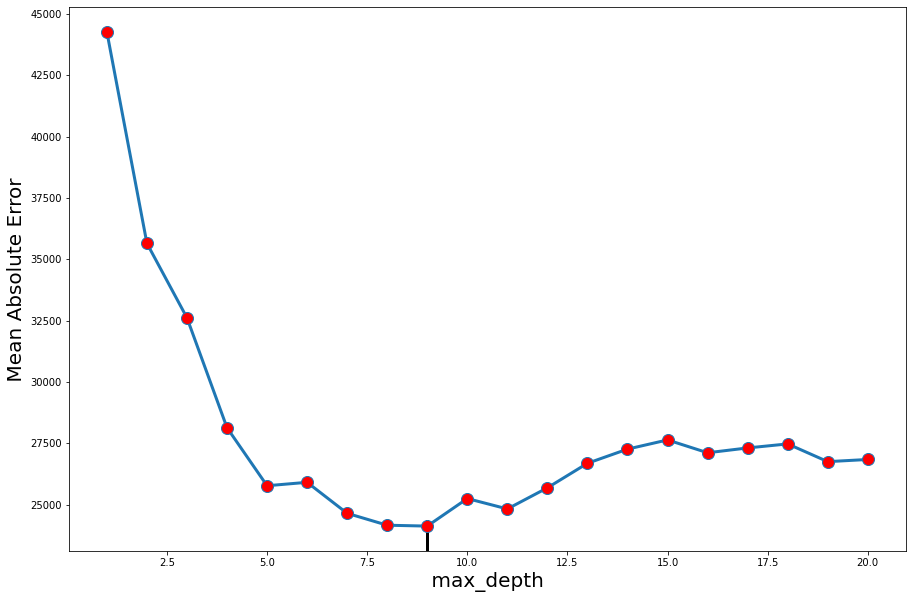

In [26]:
#Let see the above result visually
x_axis,y_axis = np.array(list(DTR_MAE.keys())),np.array(list(DTR_MAE.values()))
fig,ax = plt.subplots(figsize=(15,10))

plt.xlabel(' max_depth ',fontsize=20)
plt.ylabel(' Mean Absolute Error ',fontsize=20)
y_max = DTR_MAE[min(DTR_MAE,key=DTR_MAE.get)]
plt.axvline(x=min(DTR_MAE,key=DTR_MAE.get),ymin=0,ymax=0.055,color='k',linewidth=3.0)
plt.plot(x_axis,y_axis,'-',marker='o',linewidth=3.0,markersize=12,markerfacecolor='red');

**This chart shows that as max_depth increases, the error initially decreases, but after some value it starts to increase**

In [27]:
print(f' Value of max_depth at which error is small is {min(DTR_MAE,key=DTR_MAE.get)} ')

 Value of max_depth at which error is small is 9 


In [28]:
DTR_model = DecisionTreeRegressor(max_depth=9,random_state=1)
DTR_model.fit(train_X,train_Y)
y_predict = DTR_model.predict(test_X)
DTR_MAE = mean_absolute_error(test_Y,y_predict)
round(DTR_MAE,3)

24133.544

In [29]:
#Accuracy in the training data set
y_predict_train         = DTR_model.predict(train_X)
mae_train               = mean_absolute_error(train_Y,y_predict_train)
errors_train            = abs(y_predict_train-train_Y)
mean_absolute_error_per = 100*np.mean(errors_train/train_Y)
Accuracy_train          = 100-mean_absolute_error_per
R2_score_Train          = 1-(sum( (train_Y-y_predict_train)**2)/sum( (train_Y-train_Y.mean())**2) )

#Accuracy in the test data set
y_predict               = DTR_model.predict(test_X)
mae                     = mean_absolute_error(test_Y,y_predict)
errors                  = abs(y_predict-test_Y)
mean_absolute_error_per = 100*np.mean(errors/test_Y)
Accuracy                = 100-mean_absolute_error_per
R2_score_test           = 1- ( sum( (test_Y-y_predict)**2 )/sum( ( test_Y-test_Y.mean() )**2 ) )

print(' Model Performance is the following ')


print(' ================RESULTS======================  ')
print()
print(' In the train data set  ')
print()
print(f' The mean absolute error : ${round(mae_train,2)}. ')
print(f' Average Error           : ${round(np.mean(errors_train),2)}')
print(f' Accuracy                : {round(Accuracy_train,2)}%.')
print(f' R2 score on training data : {round(R2_score_Train,2)}')
print()
print(' In the test data set  ')
print()
print(f' The mean absolute error : ${round(mae,2)}. ')
print(f' Average Error           : ${round(np.mean(errors),2)}')
print(f' Accuracy                : {round(Accuracy,2)}%.')
print(f' R2 score on testing data : {round(R2_score_test,2)}')
print(' =============================================  ')

 Model Performance is the following 
 ================RESULTS======================  

 In the train data set  

 The mean absolute error : $10987.35. 
 Average Error           : $10987.35
 Accuracy                : 93.42%.
 R2 score on training data : 0.96

 In the test data set  

 The mean absolute error : $24133.54. 
 Average Error           : $24133.54
 Accuracy                : 85.79%.
 R2 score on testing data : 0.79


**Compared to the above calculation with standard parameters of a single decision tree, hyperparameter tuning has improved the model accuracy. The accuracy of the test data is increased by approx 2% and the accuracy of the train data is reduced by approx 6%. Despite this gain, the accuracy of the single decision tree is still lower than that of the random forest regressor (see the first part of discussion).** 

# **Random Forest Method as estimator in Grid Search CV**
**Hyperparameters tunning with GridSearchCV method**

In [30]:
#parameters = {'n_estimators':[int(x) for x in np.linspace(start=100,stop=1000,num=10)],
#             'max_features':[int(x) for x in np.linspace(start=1,stop=5,num=5)],
#             'max_depth':[2,3,4,5,6,7],
#             'min_samples_leaf':[3,4,5],
#             'random_state':[1]}
parameters = {'n_estimators':[int(x) for x in np.linspace(start=50,stop=600,num=12)],
             'max_features':[int(x) for x in np.linspace(start=1,stop=3,num=3)],
             'max_depth':[2,3,4,5,6,7],
             'min_samples_leaf':[3,4,5],
             'random_state':[1]}
RFR_model  = RandomForestRegressor()
GSCV_model = GridSearchCV(estimator=RFR_model,param_grid=parameters,cv=5,n_jobs=5,return_train_score=True)
#Specifyin' the following scoring techine will display warning message in the console after execution.
#GSCV_model = GridSearchCV(estimator=RFR_model,param_grid=parameters,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)
GSCV_model.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600],
                         'random_state': [1]},
             return_train_score=True)

In [31]:
GSCV_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600],
                         'random_state': [1]},
             return_train_score=True)

In [32]:
Best_Grid_param = GSCV_model.best_params_
Best_Grid_param
#pd.DataFrame(GSCV_model.cv_results_)
GSCV_model.best_estimator_

RandomForestRegressor(max_depth=7, max_features=3, min_samples_leaf=3,
                      random_state=1)

In [33]:
def evaluate(Best_model,train_X,train_Y,test_X,test_Y):        
    
    #set up model architecture
    RFR_model = Best_model
    #Fit the model parameters using training data
    RFR_model.fit(train_X,train_Y)
    #Performance on training data set
    
    y_predict_train          = RFR_model.predict(train_X)
    errors_train             = abs(train_Y-y_predict_train)
    mean_absolute_error_per  = 100*np.mean(errors_train/train_Y)
    Accuracy_train           = 100-mean_absolute_error_per
    R2_score_train           = RFR_model.score(train_X,train_Y)
    
    
    #Performance on test data set
    #Use the fitted parameter on the test data set--so called the unseen data
    predict_Y                = RFR_model.predict(test_X)
    #Absolute error = |true value - predicted value|
    errors_test              = abs(predict_Y - test_Y)
    #Relative error in percentage
    mean_absolute_error_per  = 100 * np.mean(errors / test_Y)
    #1-error = accuracy or 100-error% = accuracy %
    Accuracy_test            = 100 - mean_absolute_error_per
    
    #Calculating R2 score (here I am calculating manually).
    Nominator        = sum((test_Y-predict_Y)**2)
    Denominator      = sum((test_Y-test_Y.mean())**2)
    R2_score_test          = (1-Nominator/Denominator)
    
    print(' Model Performance is the following ')


    print(' ================RESULTS======================  ')
    print()
    print(' In the train data set  ')
    print()
    print(f' The mean absolute error : ${round(np.mean(errors_train),2)}. ')
    print(f' Accuracy                : {round(Accuracy_train,2)}%.')
    print(f' R2 score on training data : {round(R2_score_Train,2)}')
    print()
    print(' In the test data set  ')
    print()
    print(f' The mean absolute error : ${round(np.mean(errors_test),2)}. ')    
    print(f' Accuracy                : {round(Accuracy_test,2)}%.')
    print(f' R2 score on testing data : {round(R2_score_test,2)}')
    print(' =============================================  ')        

Best_model      = GSCV_model.best_estimator_
evaluate(Best_model,train_X,train_Y,test_X,test_Y)





 Model Performance is the following 
 ================RESULTS======================  

 In the train data set  

 The mean absolute error : $18441.29. 
 Accuracy                : 89.1%.
 R2 score on training data : 0.96

 In the test data set  

 The mean absolute error : $22265.23. 
 Accuracy                : 85.79%.
 R2 score on testing data : 0.82


# Conclusion

* Random forest regressor (RFR), single decision tree, and grid search cv calculation are carried.
* Number of estimators of Random forest method and max_depth parameter of single decision tree is optimized with respect of mean absolute error. Meaning calculation with default parameters and with after hyperparameters tuning are performed and of course with optimized parameters model performed well.
* Random forest regressor performed well compared to the single decision tree.
* With default parameters, the random forest regressor tends to perform well compared to the decision tree regressor.
* The best estimator given by Grid Search CV method helped to reduce overfitting problem.
* In RFR, n_estimators has been changed and the mean absolute error is calculated, and taking into account the computational effort, there was a small improvement in the model to some extent before model started to perform poorly.
